In [349]:
#question1 
#question 6
#question4
import numpy as np
import matplotlib.pyplot as plt
class Polynomial:
    def __init__(self,coeff_list):
        self.coeff=coeff_list
    def __str__(self):
        print(f" Coefficients of the polynomial are:")
        print(self.coeff)
        return ""
    def length(self):
        return len(self.coeff)
    def coeff_list(self):
        return self.coeff
    def __add__(self,other):
        m1=min(len(self.coeff),len(other.coeff))
        m2=max(len(self.coeff),len(other.coeff))
        new_coeff=[0]*m2
        for i in range(m1):
            new_coeff[i]=self.coeff[i]+other.coeff[i]
        if(m2==len(self.coeff)):
            for i in range(m1,m2):
                new_coeff[i]=self.coeff[i]
        else:
            for i in range(m1,m2):
                new_coeff[i]=other.coeff[i]
        
        return Polynomial(new_coeff)
    
    def __sub__(self,other):
        m1=min(len(self.coeff),len(other.coeff))
        m2=max(len(self.coeff),len(other.coeff))
        new_coeff=[0]*m2
        for i in range(m1):
            new_coeff[i]=self.coeff[i]-other.coeff[i]
        if(m2==len(self.coeff)):
            for i in range(m1,m2):
                new_coeff[i]=self.coeff[i]
        else:
            for i in range(m1,m2):
                new_coeff[i]=-1*other.coeff[i]
        
        return Polynomial(new_coeff)
    def __mul__(self,other):
        new_coeff=[0]*(len(self.coeff)+len(other.coeff)-1)
        for i in range(len(self.coeff)):
            for j in range(len(other.coeff)):
                new_coeff[i+j]+=self.coeff[i]*other.coeff[j]
#                 print(new_coeff[i])
        return Polynomial(new_coeff)
    def __rmul__(self,other):
        new_coeff=[0]*len(self.coeff)
        if isinstance(other,int):
            for i in range(len(self.coeff)):
                new_coeff[i]=self.coeff[i]*other
            return Polynomial(new_coeff)    
#         else:
#             for i in range(len(self.coeff)):
#                 new_coeff[i]=self.coeff[i]*other.coeff[i]
#             return Polynomial(new_coeff)

    def __getitem__(self,num):
        val=0
        for i in range(len(self.coeff)):
            val+=self.coeff[i]*(num**i)
        return val  
        
    def __setitem__(self,index,num):
        self.coeff[index]=num
        
        
        
    
    def show(self,left,right):
        #dividing the indexes in the range of 10
        div=(right-left)/100
        output=[0]*101
        inputt=[0]*101
        for i in range(101):
            output[i]=self.__getitem__(left+div*i)
            inputt[i]=left+div*i
        plt.plot(inputt,output)
        plt.show()
            
    def  fitviamatrixmethod(self,mapping):
        degree=len(mapping)
        output_list=[mapping[i][1] for i in range(len(mapping))]
        input_matrix=[]
        
        for i in range(len(mapping)):
            output_row=[]
            for j in range(degree):
                output_row.append(mapping[i][0]**j)
            input_matrix.append(output_row)
        coeff=np.linalg.solve(input_matrix,output_list)
        p5=Polynomial(coeff)
        return p5.show(-1,3)
    
    
    def fitvialagrangepoly(self,mapping):
        degree=len(mapping)
        p_0=Polynomial([0]*degree)
        for i in range(degree):
            p0=Polynomial([1])
            denom=1
            for j in  range(degree):
                if(i!=j):
                    p1=Polynomial([mapping[j][0],1])
                    p0=p0*p1
                    denom*=(mapping[i][0]-mapping[j][0])
#             print(p0)       
            for j in  range(degree):
                p0[j]=p0[j]/denom
                p0[j]*=mapping[i][1]
#                 print(p0[j])
#             print(p0)    
            p_0=p_0+p0
            print(p_0)   
        return p_0.show(-10,10)


    def derivative(self):
        derivative_list=[0]*(len(self.coeff))
        for i in range(len(derivative_list)-1,0,-1):
            # print(self.coeff[i])
            derivative_list[i-1]=self.coeff[i]*i
        derivative_poly=Polynomial(derivative_list)
        return derivative_poly


    def get_value(self,x):
        val=0
        for i in range(len(self.coeff)):
            val+=self.coeff[i]*(num**i)
        return val  
        
   
    def area(self,a,b):
        result=integrate.quad(self.__getitem__,a,b)
        return result




def model_function(array,n):
    #using normal equations
    row=[0]*(n)
    matrix=[]
    result_matrix=[0]*(n)
    x_data, y_data = zip(*array)
    m=len(x_data)
    # print(m)
    # for i in range(n+1):
    #     matrix[i]=row
    # print(x_data,y_data)    
    for j in range(n):
        each_row=[]
        for k in range(n):
            coeff=0
            ans_coeff=0
            for m1 in range(m):
                coeff+=x_data[m1]**(j+k)
                # print(coeff)
                # print(j+k)
                ans_coeff+=y_data[m1]*x_data[m1]**(j)
            # print(j+k)
            print(coeff,"coeff")
            print(j,k,"j and k")
            # matrix[j][k]=coeff
            each_row.append(coeff)
            # print(matrix[j][k])
        result_matrix[j]=ans_coeff
        matrix.append(each_row)
    print(matrix)
    print(result_matrix)
    print(np.linalg.det(matrix))
    answer=np.linalg.solve(matrix,result_matrix)
    estimated_poly=Polynomial(answer)
    estimated_poly.show(1,10)
    return estimated_poly
    
    
                
        
        
    
            
                
                
                
                
                    
        
                    
                    
                    
                    
        
        
        
        
        
p1=Polynomial([1,2,3])
p1[2]

                
            
        

    
    
    
        
    


17

2 coeff
0 0 j and k
3 coeff
0 1 j and k
5 coeff
0 2 j and k
9 coeff
0 3 j and k
3 coeff
1 0 j and k
5 coeff
1 1 j and k
9 coeff
1 2 j and k
17 coeff
1 3 j and k
5 coeff
2 0 j and k
9 coeff
2 1 j and k
17 coeff
2 2 j and k
33 coeff
2 3 j and k
9 coeff
3 0 j and k
17 coeff
3 1 j and k
33 coeff
3 2 j and k
65 coeff
3 3 j and k
[[2, 3, 5, 9], [3, 5, 9, 17], [5, 9, 17, 33], [9, 17, 33, 65]]
[7, 12, 22, 42]
-8.835242138475338e-29


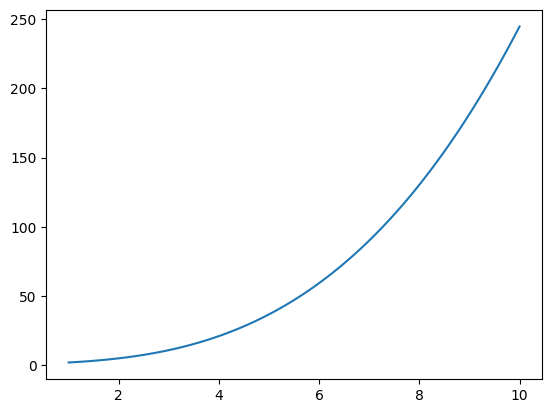

In [350]:
model_function([(1,2),(2,5)],4)

In [351]:
# question 2
import scipy.integrate  as integrate
def integrate_function(init_val,final_val,function,*args):
    return integrate.quad(function,init_val,final_val,args=args)

def acc_function(x,j):
    return (x**(j))*(np.sin(x)+np.cos(x))

def first_function(x,j,k):
    return x**(j+k)

# integrate.quad(first_function,0,np.pi,args=(j,k))


result_matrix=[]
def approx_poly(n):
    approx_matrix=[]
    
    for j in range(n):
        each_row=[]
        for k in range(n):
            # print(j)
            coeff=integrate.quad(first_function,0,np.pi,args=(j,k))[0]
            each_row.append(coeff)
        
        result_cell=integrate_function(0,np.pi,acc_function,j)[0]
        
        result_matrix.append(result_cell)
        
        approx_matrix.append(each_row)
        
    # print(approx_matrix)
    # print("\n")
    # print(result_matrix)
    approximated_poly=np.linalg.solve(approx_matrix,result_matrix)
    
    final_polynomial=Polynomial(approximated_poly)
    
    return final_polynomial
# approx_poly(5)
        
        



In [352]:
# import scipy.integrate  as integrate
# def first_function(x,1,1):
#     return x**(j+k)

# integrate.quad(first_function,0,np.pi)

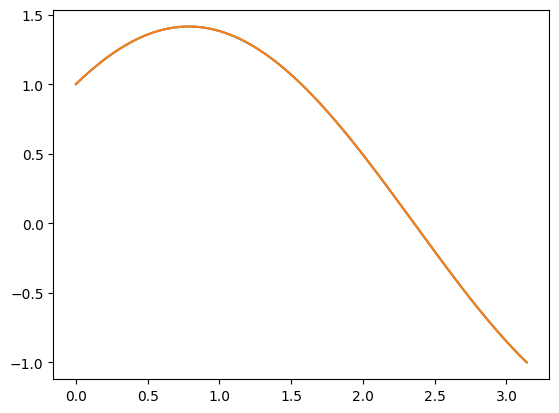

In [353]:
poly=approx_poly(6)

points=np.linspace(0,np.pi,1000)

x_list=[]
y_list=[]
for i in points:
    x_list.append(i)
    y_list.append(np.sin(i)+np.cos(i))
plt.plot(x_list,y_list)
poly.show(0,np.pi)
plt.show()



In [354]:
#question 3

def two_exponential(n):
    return 2**n
def factorial_calculation(n):
    # print(n)
    if n<=1:
        return 1
    else:
        return n*factorial_calculation(n-1)
    
def compute_nth_legendre(n):
    n=n-1
    if n==0:
        return Polynomial([1])
    factorial=factorial_calculation(n)
    two_power=two_exponential(n)
    
    p1=Polynomial([-1,0,1])
    
    p2=Polynomial([-1,0,1])
    
    for i in range(n-1):
    
        p2=p1*p2
    
    for i in range(n):
    
        p2=p2.derivative()
 
    length=p2.length()
    p3=p2.coeff_list()
    for i in range(length):
        p3[i]=p3[i]/(two_power*factorial)
    return Polynomial(p3)
print(compute_nth_legendre(2))
        
    
    

 Coefficients of the polynomial are:
[0.0, 1.0, 0.0]



In [355]:
#question 5
#supposing the weight function to be 1
def plot_function(poly):
    x_list=np.linspace(-1,1,1000)
    y_list=[]
    for i in range(len(x_list)):
        y_list.append(poly[x_list[i]])
    plt.plot(x_list,y_list)



def function_calculator(x,n):
    p1=compute_nth_legendre(n)
    # print(p1)
    p2=p1*p1
    # print(p2)
    # print(p2,"this is p2")
    
    value=p2[x]
    return value
#for obtaining phi^2(x)
def calculate_legendre_coefficients(n,a,b):
    coeff_list=[]
    for i in range(1,n):
        coeff_list.append(integrate.quad(function_calculator,a,b,args=(i))[0])
        # print(coeff_list)
    print(coeff_list,"this is coeff list")
    return coeff_list
        
#calculates the rhs part ,that is w(x)*phi(x)*f(x)
#here f(x) is e^x

# print(function_calculator(5,1))
def second_function_calculator(x,polynomial):
    return polynomial[x]*np.exp(x)
def calculate_using_legendre(n):
    a=-1
    b=1
    n=n+1
    function_coeff=[]
    denom=calculate_legendre_coefficients(n,a,b)
    print(denom,"denom")
    for i in range(1,n):
        poly=compute_nth_legendre(i)
      
        function_coeff.append(integrate.quad(second_function_calculator,a,b,args=(poly))[0])
        
        function_coeff[-1]=function_coeff[-1]/denom[i]
    
    new_approximated_poly=Polynomial(function_coeff)
    print(new_approximated_poly,"approx")
    #new apporximated polynomail is just the coeficients accompanying each legendre polynomial
    p1=compute_nth_legendre(0)
    for i in range(1,n):
        new_poly=compute_nth_legendre(i)
        j=0
        for i in range(new_poly.length()):
            new_poly[j]=new_poly[j]*new_approximated_poly[i]
            j+=1
        p1=p1+new_poly
    # print(p1)
    
   
    plot_function(p1)

    x_list=np.linspace(-1,1,1000)
    y_list=[]
    for i in range(len(x_list)):
        y_list.append(np.exp(x_list[i]))
    plt.plot(x_list,y_list)
    plt.show()
    




    
    
        
    
    

In [356]:
calculate_using_legendre(2)
poly=compute_nth_legendre(2)
print(integrate.quad(second_function_calculator,-1,1,args=(poly))[0]*1.5)

[2.0, 0.6666666666666666] this is coeff list
[2.0, 0.6666666666666666] denom


IndexError: list index out of range

In [357]:
calculate_legendre_coefficients(1,-1,1)

[] this is coeff list


[]

In [358]:
function_calculator(1,1)

1

In [359]:
def calculate_chebyshev(n):
    dp=[]
    dp.append(Polynomial([1]))
    dp.append(Polynomial([0,1]))
    for i in range(n):
        mul_factor=Polynomial([0,1])
        mul_factor=2*mul_factor
        pn=mul_factor*dp[-1]-dp[-2]
        dp.append(pn)
    print(dp[2])
    return dp
# print(dp)
calculate_chebyshev(5)
    
        
        

 Coefficients of the polynomial are:
[-1, 0, 2]



In [360]:
#question 6
poly_list=calculate_chebyshev(5)

def fun_calculator(x,p1,p2):
    return p1[x]*p2[x]*(1/((1-x**2)**0.5))



def demonstrate_orthogonal():
    for i in range(5):
        p1=poly_list[i]
        for j in range(5):
            print(i,j)
            p2=poly_list[j]
            print(integrate.quad(fun_calculator,-1,1,args=(p1,p2)))
demonstrate_orthogonal()
    
    


 Coefficients of the polynomial are:
[-1, 0, 2]

0 0
(3.141592653589591, 6.200897573194197e-10)
0 1
(0.0, 2.1441883120606258e-14)
0 2
(-1.9864679913457918e-13, 7.177002446118313e-09)
0 3
(0.0, 2.1126705573198142e-14)
0 4
(-5.326059329524154e-12, 5.781898340868373e-11)
1 0
(0.0, 2.1441883120606258e-14)
1 1
(1.5707963267946814, 3.896870381936424e-09)
1 2
(0.0, 1.2789912195869652e-14)
1 3
(5.730181296976583e-12, 2.340077922110947e-11)
1 4
(0.0, 1.3144511336771017e-14)
2 0
(-1.9864679913457918e-13, 7.177002446118313e-09)
2 1
(0.0, 1.2789912195869652e-14)
2 2
(1.5707963267948821, 1.758670364893078e-08)
2 3
(0.0, 1.3129293014018425e-14)
2 4
(-2.1380211839479456e-12, 4.2724113675429726e-10)
3 0
(0.0, 2.1126705573198142e-14)
3 1
(5.730181296976583e-12, 2.340077922110947e-11)
3 2
(0.0, 1.3129293014018425e-14)
3 3
(1.5707963267927294, 4.2759085161492294e-10)
3 4
(0.0, 1.319428049262848e-14)
4 0
(-5.326059329524154e-12, 5.781898340868373e-11)
4 1
(0.0, 1.3144511336771017e-14)
4 2
(-2.138021183947

/tmp/ipykernel_5878/933057767.py:16: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(cos,a,b,args=(k))[0]
/tmp/ipykernel_5878/933057767.py:42: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-pu

[0, 3.6760779103749774, -2.9408623282999815, 2.205646746224986, -1.7299190166470477, 1.4138761193749907, -1.1922414844459395, 1.0293018149049924, -0.9048807163999936, 0.8069439315457276, -0.7279362198762328, 0.6628992953135189, -0.6084542748206845, 0.5622236804102906, -0.5224882309162414, 0.48797494385508555, -0.4577217631595301, 0.430988444664653, -0.40719632237999936, 0.38588663147582863, -0.3666910633790505, 0.34931057066912136, -0.33349985166288537, 0.31905581863632276, -0.3058089076221827, 0.2936164465155744, -0.2823575352134371, 0.27192905090444364, -0.2622425006127376, 0.25322151876692484, -0.24479986084627994, 0.23691978216553655, -0.2295307183063406, 0.22258820374747454, -0.21605298003932594, 0.20989025589416857, -0.20406908985890485, 0.19856187253120391, -0.19334389009584474, 0.1883929546709897, -0.1836890898375993, 0.17921426198023574, -0.1749521498422141, 0.17088794610392463, -0.16700818591275562, 0.16330059819040538, -0.1597539762657035, 0.1563580649661794, -0.153103461777

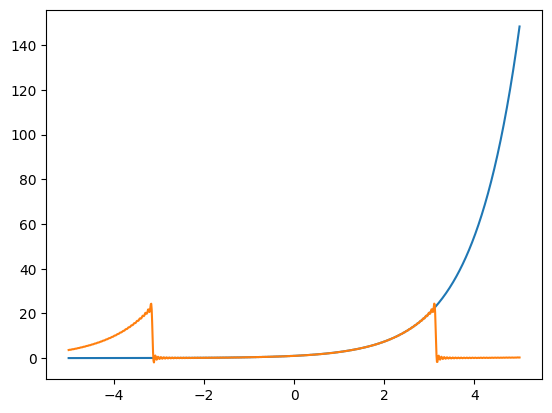

In [376]:
#question 7
#another attempt

def sin(x,k):
    return np.sin(k*x)*np.sin(k*x)

def cos(x,k):
    return np.cos(k*x)*np.cos(k*x)


def calculate_denom_sin(k,a,b):
    return integrate.quad(sin,a,b,args=(k))[0]


def calculate_denom_cos(k,a,b):
    return integrate.quad(cos,a,b,args=(k))[0]



def calculate_e_sin(x,k):
    return np.sin(k*x)*np.exp(x)


def calculate_e(x):
    return np.exp(x)


def calculate_e_cos(x,k):
    return np.cos(k*x)*np.exp(x)

def fourier_transform(n):

    #calculating a-coefficients
    a=-np.pi
    b=np.pi

    sin_list=[0]
    cos_list=[0]
    for i in range(1,n+1):
        denom=calculate_denom_cos(i,a,b)

        coeff=integrate.quad(calculate_e_cos,a,b,args=(i))[0]
        coeff=coeff/denom
        cos_list.append(coeff)


    for i in range(1,n+1):
        denom=calculate_denom_sin(i,a,b)

        coeff=integrate.quad(calculate_e_sin,a,b,args=(i))[0]
        coeff=coeff/denom
        sin_list.append(coeff)

    #for calculating the a0 part
    denom=b-a
    coeff=integrate.quad(calculate_e,a,b)[0]
    coeff=coeff/denom

    print(sin_list)
    print(cos_list)
    print(coeff)



    x=np.linspace(-5,5,1000)
    result_list_approx=[]
    result_list_acc=[]
    for i in range(len(x)):
        sum=0
        
        result_list_acc.append(np.exp(x[i]))
        
        for j in range(len(sin_list)):

            sum+=np.sin(j*x[i])*sin_list[j]

        for j in range(len(cos_list)):

            sum+=np.cos(j*x[i])*cos_list[j]

        sum+=coeff
        result_list_approx.append(sum)
    plt.plot(x,result_list_acc)
    plt.plot(x,result_list_approx)
    plt.show()

        
            
        
        
        

fourier_transform(100)


    
    
    

    
        
        
        
        
    

































In [26]:
#question 8

from scipy.fft import fft,ifft




def multiply_fast(a,b):
    a_list=list(str(a))
    b_list=list(str(b))
    len_a=len(a_list)
    len_b=len(b_list)
    for i in range(len(a_list)):
        a_list[i]=int(a_list[i])*(10**(len_a-1-i))

    for i in range(len(b_list)):
        b_list[i]=int(b_list[i])*(10**(len_b-1-i))

    
        

    n1=2*max(len_a,len_b)
    a_list.extend([0]*(n1-len_a))
    b_list.extend([0]*(n1-len_b))
    a_fft=fft(a_list)
    b_fft=fft(b_list)
    c_fft=[0]*n1
    # print(ifft(b_fft))
    # print(a_fft)
    # print(b_fft)
    for i in range(len(a_fft)):
            c_fft[i]=a_fft[i]*b_fft[i]
            # print(curr*b_fft[j])
    
    # print(a_fft)
    final_val=ifft(c_fft)
    return final_val

a=multiply_fast(1523399281902,21738902982025)

print(sum(a))



(3.3117029192154125e+25+6.984919309616089e-10j)
